# Elsevier API

In [1]:
from lxml import etree
import gzip
import os
import requests

### Links

* see also https://codebeautify.org/xmlviewer
* `@xmlns:prism:http://prismstandard.org/namespaces/basic/2.0/` Publishing Requirements for Industry Standard Metadata.
* http://purl.org/ PURLs are persistent URLs, they provide permanent addresses for resources on the web.
* http://dublincore.org/documents/dcmi-terms/
* https://www.elsevier.com/authors/author-schemas/elsevier-xml-dtds-and-transport-schemas
* http://xmlgrid.net/ display xml (good to grab XPath)
* Elsevier API docs https://dev.elsevier.com/api_docs.html

In [2]:
from pygments import highlight
from IPython.display import HTML
import json

from pygments.lexers import XmlLexer,  JsonLexer
from pygments.formatters import HtmlFormatter

lexer = XmlLexer()
jsonlexer = JsonLexer()
htmlfmt = HtmlFormatter(style='colorful', cssclass='highlight')


def tostring(e):
    return etree.tostring(e, encoding='unicode', pretty_print=True)


def showxml(e):
    if not isinstance(e, list):
        e = [e]
    return HTML('<hr/>'.join(highlight(tostring(n), lexer, htmlfmt) for n in e))

def showjson(e):
    if not isinstance(e, list):
        e = [e]
    return HTML('<hr/>'.join(highlight(json.dumps(n, separators=(',', ': '), indent=2), 
                                       jsonlexer, htmlfmt) for n in e))

HTML('<style type="text/css">' +  htmlfmt.get_style_defs() + '</style>')

# Elsevier API

see https://dev.elsevier.com/index.html
and https://github.com/ElsevierDev/elsapy

json response doesn't seem to have all the data.

In [3]:
import requests
from io import BytesIO
from bs4 import BeautifulSoup

PMID_ELSEVIER = 'http://api.elsevier.com/content/article/pubmed_id/{}'
EKEY = '305ac4275ea475891668f6a71234efbc'
Headers = {'X-ELS-APIKey': EKEY}


def elsevier(pmid, url=PMID_ELSEVIER):
    resp = requests.get(url.format(pmid),
                        headers=Headers,
                        params={'view': 'full'}  # Do we need this?
                        )

    # for row in Events().parse(BytesIO(resp.content),'elsevier'):
    #    print(row)#,end=' ')

    soup = BeautifulSoup(BytesIO(resp.content), "xml")
    if soup.find('service-error'):
        print('no such document:', pmid, file=sys.stderr)
        return None
    else:
        return soup.prettify()


def elsevier_xml(pmid, url=PMID_ELSEVIER):
    resp = requests.get(url.format(pmid),
                        headers=Headers,
                        params={'view': 'full', }
                        )

    parser = etree.XMLParser(ns_clean=True)
    tree = etree.parse(BytesIO(resp.content), parser)

    root = tree.getroot()
    return root


def get_object(url):
    resp = requests.get(url,
                        headers=Headers,
                        params={'httpAccept': '*/*'}
                        )
    return resp.content

In [4]:
def getxml(pmid):
    parser = etree.XMLParser(ns_clean=True)
    with open('elsevier/xml/{}.xml'.format(pmid), 'rb') as fp:
        tree = etree.parse(fp, parser)

    root = tree.getroot()
    return root


def getxmlepmc(pmid):
    parser = etree.XMLParser(ns_clean=True)
    with open('elsevier/xml_epmc/{}.xml'.format(pmid), 'rb') as fp:
        tree = etree.parse(fp, parser)

    root = tree.getroot()
    return root

In [164]:
epmc = getxmlepmc('PMC1087855')

In [7]:
resp = requests.get(PMID_ELSEVIER.format('17586462'), 
                    headers={ 'X-ELS-APIKey': EKEY, 'Accept': 'application/json'},
                   params={'view': 'documents'})

``application/pdf`` seems only to return first page!

In [5]:
resp = requests.get(PMID_ELSEVIER.format('17586462'), 
                    headers={ 'X-ELS-APIKey': EKEY, 'Accept': 'application/pdf'},
                   params={'view': 'full'})

In [27]:
resp.content

b'%PDF-1.4\n%\xe2\xe3\xcf\xd3\n2 0 obj\n<</Length 49/Filter/FlateDecode>>stream\nx\x9c+\xe4r\n\xe126S\xb000S\x08I\xe1r\r\xe1\n\xe4*T0T0\x00B\x08\x99\x9c\xab\xa0\x1f\x91f\xa8\xe0\x92\xaf\x10\xc8\x05\x00\xea\xa2\t\xf2\nendstream\nendobj\n4 0 obj\n<</Type/Page/MediaBox[0 0 595 842]/Resources<</XObject<</Xf1 1 0 R>>>>/Contents 2 0 R/Parent 3 0 R>>\nendobj\n1 0 obj\n<</Filter/FlateDecode/Length 5004/Resources<</XObject<</Im1 5 0 R/Im2 6 0 R/Im3 7 0 R>>/ColorSpace<</Cs6 8 0 R>>/Font<</F1 9 0 R/F2 10 0 R/F3 11 0 R/F4 12 0 R/F5 13 0 R/F6 14 0 R/F7 15 0 R>>/ProcSet[/PDF/Text/ImageB]/ExtGState<</GS1 16 0 R>>>>/Type/XObject/Subtype/Form/BBox[0 0 595.28 793.7]/Matrix[1 0 0 1 0 0]/FormType 1>>stream\nx\x9c\x95Z]s\xdbF\xb2\xad\xdaG\xfd\n>\xdc\x07h\xaf\x04c\x063\xf8p^Vv\x9cd\xed8\xf1\xc6\xda\xca\xa6\x94<@\x14$"!\t-@Z\xab\xfb\x9e_\xb0\x7f\xf8\x9e\xd3=\x00\tJ\xf4f+U\x0e\x05\x0cfz\xfa\xe3\xf4\xe9\x9ey\xf1\xba\xcff\xf3~\x96\xc8\x7f\xfd|}\xf2\xe2\xeb\x8ffv\xd7\x9f\xa46\xce\x8d\x9d9W\xc6\xb643o\x938qn\x96\

In [28]:
with open('xxxx.pdf', 'wb') as fp:
    fp.write(resp.content)

In [ ]:
r['full-text-retrieval-response']['originalText']['xocs:doc'].keys()

In [24]:
resp = requests.get('https://api.elsevier.com/content/abstract/citation-count', 
                    headers={ 'X-ELS-APIKey': EKEY, 'Accept': 'application/json'},
                    params= {'pubmed_id':'17586462'})

In [25]:
resp.json()

{'service-error': {'status': {'statusCode': 'AUTHENTICATION_ERROR',
   'statusText': 'Requestor configuration settings insufficient for access to this resource.'}}}

In [6]:
with open(os.path.expanduser('~/17586462.xml')) as fp:
    parser = etree.XMLParser(ns_clean=True)
    tree = etree.parse(fp, parser)

root = tree.getroot()


In [7]:
showxml(root)

In [8]:
NS = root.nsmap.copy()
NS['e'] = NS[None]
del NS[None]
NS

{'bk': 'http://www.elsevier.com/xml/bk/dtd',
 'cals': 'http://www.elsevier.com/xml/common/cals/dtd',
 'ce': 'http://www.elsevier.com/xml/common/dtd',
 'dc': 'http://purl.org/dc/elements/1.1/',
 'dcterms': 'http://purl.org/dc/terms/',
 'e': 'http://www.elsevier.com/xml/svapi/article/dtd',
 'ja': 'http://www.elsevier.com/xml/ja/dtd',
 'mml': 'http://www.w3.org/1998/Math/MathML',
 'prism': 'http://prismstandard.org/namespaces/basic/2.0/',
 'sa': 'http://www.elsevier.com/xml/common/struct-aff/dtd',
 'sb': 'http://www.elsevier.com/xml/common/struct-bib/dtd',
 'tb': 'http://www.elsevier.com/xml/common/table/dtd',
 'xlink': 'http://www.w3.org/1999/xlink',
 'xocs': 'http://www.elsevier.com/xml/xocs/dtd',
 'xsi': 'http://www.w3.org/2001/XMLSchema-instance'}

In [ ]:
[(r.tag,r.text) for r in root.xpath('//prism:*', namespaces=NS)] 

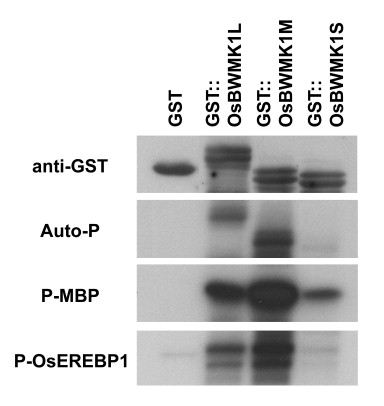

In [12]:
from IPython.display import Image

Image(get_object('http://api.elsevier.com/content/object/eid/1-s2.0-S0006291X07012508-fx2.jpg'))

In [ ]:
[r.text for r in root.xpath('//e:objects/e:object', namespaces=NS)]

In [ ]:
showxml([r for r in root.xpath('//ce:bib-reference', namespaces=NS)])

In [ ]:
[(r.xpath('./ce:surname/text()', namespaces=NS),
 r.xpath('./ce:given-name/text()', namespaces=NS))
 for r in root.xpath('//ce:bib-reference/sb:reference/sb:contribution/sb:authors/sb:author', namespaces=NS)]

In [ ]:
root.xpath('//ce:bib-reference/ce:reference', namespaces=NS)

In [ ]:
[r for r in root.xpath('/e:full-text-retrieval-response/e:pubmed-id[1]/text()', namespaces=NS)]

In [ ]:
e= root.xpath('/e:full-text-retrieval-response', namespaces=NS)[0]
e.getchildren()

In [ ]:
[r for r in root.xpath('/e:full-text-retrieval-response/e:originalText/xocs:doc//ja:article', namespaces=NS)]

In [ ]:
''.join(r for r in root.xpath('//ja:article/ja:head//ce:abstract-sec//text()', namespaces=NS)).strip()

In [ ]:
[''.join(r.xpath('//text()')) for r in root.xpath('//ja:article/ja:body//ce:sections//ce:para', namespaces=NS)]

In [ ]:
from itertools import chain
list(chain(r.xpath('./ce:para|./ce:section', namespaces=NS) 
           for r in root.xpath('//ja:article/ja:body//ce:sections', namespaces=NS)))

In [ ]:
list(chain(*[r.xpath('./ce:para|./ce:section', namespaces=NS) 
           for r in root.xpath('//ja:article/ja:body//ce:appendices', namespaces=NS)]))

In [13]:
CE = NS['ce']
TAG = '{%s}%%s' % CE
XREFS = {TAG % 'cross-ref', TAG % 'cross-refs'}
ITALIC = {TAG % 'italic'}
def para2txt(e):
    for t in e.xpath('.//text()'):
        p = t.getparent()
        if p.tag in XREFS:
            if p.tail == t:
                yield p.tail
            else:
                yield '[%s]' % p.attrib['refid']
        elif p.tag in ITALIC and p.tail != t:
            yield '*%s*' % t
        else:
            yield str(t)


In [ ]:
paras = list(chain(*[r.xpath('./ce:para', namespaces=NS) 
           for r in root.xpath('//ja:article/ja:body//ce:sections', namespaces=NS)]))
paras

In [ ]:

showxml(paras)

In [ ]:
''.join(para2txt(paras[1]))

In [ ]:
showxml(paras[1])

In [ ]:
sections = [(r.attrib['id'], r.xpath('.//ce:para', namespaces=NS))
               for r in root.xpath('//ja:article/ja:body//ce:section', namespaces=NS)]
sections

In [5]:
# CE = NS['ce']
CE = 'http://www.elsevier.com/xml/common/dtd'
TAG = '{%s}%%s' % CE
XREFS = {TAG % 'cross-ref', TAG % 'cross-refs'}
ITALIC = {TAG % 'italic'}
def para2txt(e):
    for t in e.xpath('.//text()'):
        p = t.getparent()
        if p.tag in XREFS:
            if p.tail == t:
                yield p.tail
            else:
                yield '[%s]' % p.attrib['refid']
        elif p.tag in ITALIC and p.tail != t:
            yield '<i>%s</i>' % t
        else:
            yield str(t)

E = '/e:full-text-retrieval-response'
ART = '*[self::ja:converted-article or self::ja:article]'
class Elsevier(object):
    def __init__(self, root):
        self.root = root
        ns = root.nsmap.copy()
        ns['e'] = ns.pop(None)

        self.ns = ns
        
    def xpath(self, path, e=None):
        if e is None:
            return self.root.xpath(path, namespaces=self.ns)
        else:
            return e.xpath(path, namespaces=self.ns)

    @property
    def scopus_id(self):
        return self.xpath(E + '/e:scopus-id[1]/text()')[0]
    
    @property
    def doi(self):
        return self.xpath(E + '/e:coredata/prism:doi[1]/text()')[0]

    @property
    def doi2(self):
        return self.xpath(E + '/e:originalText/xocs:doc/xocs:meta/xocs:doi//text()')[0]
    
    @property
    def pubmid(self):
        return self.xpath(E + '/e:pubmed-id[1]/text()')[0]
    
    @property
    def title(self):
    
        t =  self.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:head/ce:title')
        t = t[0]
        return ''.join(para2txt(t)).strip()
    
    @property
    def abstract(self):
        t =  self.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:head/ce:abstract/ce:abstract-sec')
        t = t[0]
        return ''.join(para2txt(t)).strip()
    
      
    def sections(self, e):
        for c in e.getchildren():
            if c.tag == '{http://www.elsevier.com/xml/common/dtd}para':
                yield ''.join(para2txt(c)).strip()
            elif c.tag == '{http://www.elsevier.com/xml/common/dtd}section':
                title = c.xpath('./ce:section-title//text()', namespaces=self.ns)
                if title:
                    title = ''.join(title)
                else:
                    title = None
                yield (title, c.get('id'), list(self.sections(c)))
            
    def body(self):
        secs = self.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:body/ce:sections')
        for s in secs:
            yield from self.sections(s)
            
    def bib_refs(self):
        refs = self.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:tail/ce:bibliography/ce:bibliography-sec/ce:bib-reference')
        for ref in refs:
            rid = ref.get('id')
            authors = ref.xpath('./sb:reference/sb:contribution/sb:authors/sb:author', namespaces=self.ns)
            authors = [' '.join(s.strip() for s in a.xpath('.//text()', namespaces=self.ns)).strip() for a in authors]
            title = ''.join(ref.xpath('./sb:reference/sb:contribution/sb:title//text()', namespaces=self.ns)).strip()
            #jtitle = ref.xpath('./sb:reference/sb:host/sb:issue/sb:series/sb:title//text()')[0]
            yield (rid, title, authors)
            

    def _results(self, text):
        secs = self.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:body/ce:sections')
        for sec in secs:
            for s in  sec.xpath('./ce:section', namespaces=self.ns):
                for t in s.xpath('.//ce:section-title/text()', namespaces=self.ns):
                    if t.lower().find(text) >= 0:
                        return s
        return None
    
    def results(self):
        return self._results('results')
    
    def methods(self):
        return self._results('methods')

In [36]:
el = Elsevier(root)
list(el.body())

['Diverse extracellular stimuli are transduced into intracellular responses by a MAPK cascade that is evolutionarily conserved in many organisms, from yeast to mammals and plants [bib1 bib2 bib3 bib4]. This conserved MAPK cascade is composed of three functionally interlinked protein kinases, MAPKKK, MAPKK, and MAPK. The <i>OsBWMK1</i> cDNA (GenBank Accession No. AF177392) was the first MAPK reported from rice whose gene expression is induced by blast fungus infection and by mechanical wounding [bib5]. Furthermore, Cheong et al. [bib6] reported that constitutive expression of <i>OsBWMK1</i> (GenBank Accession No. AF194415) in tobacco plants triggered ectopic expression of pathogenesis-related (PR) genes and enhanced resistance against fungal and bacterial infections by activating the <i>OsEREBP1</i> transcription factor. To date, many additional novel rice MAPKs have been identified and their biological roles have been characterized [bib7 bib8 bib9 bib10]. These studies have greatly inc

In [ ]:
def tohtml(el):
    def sec(s, level=2):
        for e in s:
            if isinstance(e, tuple):
                yield '<h%d>%s</h%d>' % (level, e[0] or e[1], level)
 
                yield from sec(e[2], level=level+1)
            else:
                yield '<p>%s</p>' % e
            
    return ''.join(e for e in sec(el.body()))


In [ ]:
HTML(('<h1>Abstract</h1><p>%s</p>' % el.abstract) + tohtml(el))

In [ ]:

DOI_ELSEVIER='http://api.elsevier.com/content/article/doi/{}'
x = elsevier_xml('17586462')


## Notes

* extract chemicals e.g. H_2_O_2
* extract IDs
* extract Peptides, Nucleotides

In [6]:
import re

from collections import Counter

NSRE = re.compile('^{([^}]+)}(.*)$')

PRIME = u'[\'\u2019\u2032]'
Q = [
    ('gfp', '(?:GFP|YFP)'),
    ('primer', '5' + PRIME + r'[\s-]+[CTGA ]+[\s-]+3' + PRIME),
    ('agi', r'[Aa][Tt][1-5MCmc][Gg][0-9]{5}(?:\.[0-9]{1,2})?'),
    ('vector', '[Vv]ector'),
    ('construct', '[Cc]onstruct'),
    ('dna', '[CTGA][CTGA ]{3,}[CTGA]')
]
MATCH = re.compile('(' + '|'.join('(?P<%s>%s)' % (name, regex) for name, regex in Q) + ')')


# Q = [(name,re.compile('^'+regex+'$')) for name,regex in Q]

def cvt(txt):
    idx = 0
    for m in MATCH.finditer(txt):
        s, e = m.start(0), m.end(0)
        if s > idx:
            yield None, txt[idx:s]
        match = m.group(0)
        for name, v in m.groupdict().items():
            if v is not None:
                yield name, match
                break
        else:
            yield 'unknown', match

        idx = e
    if idx < len(txt):
        yield None, txt[idx:]


class Events(object):
    TAGS = {}

    #def findmatches(self, text):
    #    return [(None, text)]

    def findmatches(self, text):
        for row in cvt(text):
            yield row

    def parse(self, fp):
        counts = Counter()

        for e, elem in etree.iterparse(fp, events=('start', 'end')):
            if e == 'start':
                tag = elem.tag
                m = NSRE.match(tag)
                if m:
                    ns, tag = m.group(1, 2)
                stag = 'start_' + tag.replace('-', '_')

                if hasattr(self, stag):
                    yield getattr(self, stag)(elem)

                else:
                    etag = self.TAGS.get(tag, 'span')
                    yield '<%s class="%s">' % (etag, tag)

                if elem.text:
                    for name, match in self.findmatches(elem.text):
                        if name:
                            counts[name] += 1
                            yield '<b class="%s">%s</b>' % (name, match)
                        else:
                            yield match

            elif e == 'end':
                tag = elem.tag
                m = NSRE.match(tag)
                if m:
                    tag = m.group(2)
                stag = 'end_' + tag.replace('-', '_')
                if hasattr(self, stag):
                    yield getattr(self, stag)(elem)
                else:
                    etag = self.TAGS.get(tag, 'span')
                    yield '</%s> ' % etag  # [sic!] add space
                if elem.tail:
                    for name, match in cvt(elem.tail):
                        if name:
                            counts[name] += 1
                            yield '<b class="%s">%s</b>' % (name, match)
                        else:
                            yield match
            else:
                RuntimeError('what event %s?' % e)

        yield '<ul class="counts">'
        for name in counts:
            yield '<li>%s:%d</li>' % (name, counts[name])
        yield '</ul>'


In [37]:
secs = root.xpath('/e:full-text-retrieval-response/e:originalText/xocs:doc/xocs:serial-item/ja:article/ja:body/ce:sections', namespaces=NS)

In [38]:
secs

[<Element {http://www.elsevier.com/xml/common/dtd}sections at 0x7f05312eb0c8>]

In [49]:
def parse(elem, level=0):

    yield 's', level, elem.tag,elem.text
    for e in elem.iterchildren():
        yield from parse(e, level=level+1)
    yield 'e', level, elem.tag, elem.tail


In [77]:
from collections import Counter
tags = set()
wc = Counter()
for sec in secs:
    for s, l, t, txt in parse(sec):
        t = t[t.index('}')+1:]
        if txt:
            tt = txt.split()
            for c in tt:
                c = c.lower()
                wc[c] += 1
        
        
        print(' '*l, s,t,repr(txt))
        tags.add(t)

 s sections '\n               '
  s para 'Diverse extracellular stimuli are transduced into intracellular responses by a MAPK cascade that is evolutionarily conserved in many organisms, from yeast to mammals and plants '
   s cross-refs '[1–4]'
   e cross-refs '. This conserved MAPK cascade is composed of three functionally interlinked protein kinases, MAPKKK, MAPKK, and MAPK. The '
   s italic 'OsBWMK1'
   e italic ' cDNA (GenBank Accession No. '
   s inter-ref 'AF177392'
   e inter-ref ') was the first MAPK reported from rice whose gene expression is induced by blast fungus infection and by mechanical wounding '
   s cross-ref '[5]'
   e cross-ref '. Furthermore, Cheong et al. '
   s cross-ref '[6]'
   e cross-ref ' reported that constitutive expression of '
   s italic 'OsBWMK1'
   e italic ' (GenBank Accession No. '
   s inter-ref 'AF194415'
   e inter-ref ') in tobacco plants triggered ectopic expression of pathogenesis-related (PR) genes and enhanced resistance against fungal and

In [78]:
wc.most_common()

[('the', 180),
 ('and', 93),
 ('of', 89),
 ('in', 55),
 ('to', 55),
 ('were', 37),
 ('osbwmk1', 36),
 ('by', 30),
 ('that', 27),
 ('was', 26),
 ('osbwmk1l', 26),
 ('transcript', 23),
 ('(', 22),
 ('.', 21),
 ('from', 21),
 ('rice', 20),
 ('as', 20),
 ('with', 18),
 ('variants', 18),
 ('2', 17),
 ('fig.', 17),
 ('different', 17),
 ('expression', 16),
 ('three', 15),
 ('we', 15),
 ('a', 14),
 ('osbwmk1m', 14),
 ('osbwmk1s', 14),
 ('using', 13),
 ('at', 13),
 ('protein', 12),
 ('expressed', 11),
 ('gene', 11),
 ('proteins', 11),
 ('various', 11),
 ('is', 10),
 ('alternative', 10),
 ('localization', 10),
 ('cell', 10),
 ('these', 9),
 ('suspension', 9),
 ('isoforms', 9),
 ('two', 9),
 ('nuclear', 9),
 ('splicing', 9),
 ('have', 8),
 ('pcr', 8),
 (',', 8),
 ('into', 7),
 ('their', 7),
 ('subcellular', 7),
 ('response', 7),
 ('or', 7),
 ('transcription', 6),
 ('products', 6),
 ('start', 6),
 ('contrast,', 6),
 ('o', 6),
 ('transcripts', 6),
 ('plants', 6),
 ('b).', 6),
 ('could', 6),
 ('are'

In [65]:
tags = set()
refs = root.xpath( '/e:full-text-retrieval-response/e:originalText/xocs:doc/xocs:serial-item/ja:article/ja:head', namespaces=NS)

for sec in refs:
    for s, l, t, txt in parse(sec):
        t = t[t.index('}')+1:]
        print(' '*l, s,t,repr(txt))
        tags.add(t)

 s head '\n            '
  s title 'Alternative splicing of the '
   s italic 'OsBWMK1'
   e italic ' gene generates three transcript variants showing differential subcellular localizations'
  e title '\n            '
  s author-group '\n               '
   s author '\n                  '
    s given-name 'Sung Cheol'
    e given-name '\n                  '
    s surname 'Koo'
    e surname '\n                  '
    s cross-ref '\n                     '
     s sup 'a'
     e sup '\n                  '
    e cross-ref '\n               '
   e author '\n               '
   s author '\n                  '
    s given-name 'Hae Won'
    e given-name '\n                  '
    s surname 'Yoon'
    e surname '\n                  '
    s cross-ref '\n                     '
     s sup 'a'
     e sup '\n                  '
    e cross-ref '\n               '
   e author '\n               '
   s author '\n                  '
    s given-name 'Cha Young'
    e given-name '\n                  '
 

In [66]:
tags

{'abstract',
 'abstract-sec',
 'affiliation',
 'author',
 'author-group',
 'correspondence',
 'cross-ref',
 'date-received',
 'e-address',
 'given-name',
 'head',
 'inf',
 'italic',
 'keyword',
 'keywords',
 'label',
 'section-title',
 'simple-para',
 'sup',
 'surname',
 'text',
 'textfn',
 'title'}

In [4]:
headers = [('Accept', 'application/vnd.crossref.unixsd+xml')]
r = requests.get('http://dx.doi.org/10.5555/515151', headers)


In [5]:
r

<Response [404]>

In [6]:
r.content

b'<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>404 Not Found</title>\n</head><body>\n<h1>Not Found</h1>\n<p>The requested URL /abstract/515151/ was not found on this server.</p>\n<hr>\n<address>Apache/2.4.7 (Ubuntu) Server at annalsofpsychoceramics.labs.crossref.org Port 80</address>\n</body></html>\n'

In [8]:
r.headers

{'Content-Type': 'text/html; charset=iso-8859-1', 'Content-Length': '319', 'Server': 'Apache/2.4.7 (Ubuntu)', 'Date': 'Fri, 23 Feb 2018 00:25:28 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}

In [3]:
root

NameError: name 'root' is not defined

In [ ]:
root = getxml('10734224')
ee = Elsevier(root)

In [57]:
ee.results()

In [13]:
root.nsmap


{None: 'http://www.elsevier.com/xml/svapi/article/dtd',
 'bk': 'http://www.elsevier.com/xml/bk/dtd',
 'cals': 'http://www.elsevier.com/xml/common/cals/dtd',
 'ce': 'http://www.elsevier.com/xml/common/dtd',
 'dc': 'http://purl.org/dc/elements/1.1/',
 'dcterms': 'http://purl.org/dc/terms/',
 'ja': 'http://www.elsevier.com/xml/ja/dtd',
 'mml': 'http://www.w3.org/1998/Math/MathML',
 'prism': 'http://prismstandard.org/namespaces/basic/2.0/',
 'sa': 'http://www.elsevier.com/xml/common/struct-aff/dtd',
 'sb': 'http://www.elsevier.com/xml/common/struct-bib/dtd',
 'tb': 'http://www.elsevier.com/xml/common/table/dtd',
 'xlink': 'http://www.w3.org/1999/xlink',
 'xocs': 'http://www.elsevier.com/xml/xocs/dtd',
 'xsi': 'http://www.w3.org/2001/XMLSchema-instance'}

In [45]:
z = '/e:originalText/xocs:doc/xocs:serial-item/*[self::ja:converted-article or self::ja:article]/ja:head/ce:title'
e = '/e:full-text-retrieval-response'
ee = e + z
ee

'/e:full-text-retrieval-response/e:originalText/xocs:doc/xocs:serial-item/*[self::ja:converted-article or self::ja:article]/ja:head/ce:title'

In [124]:
NS = root.nsmap.copy()
NS['e'] = NS.pop(None)
NS

{'bk': 'http://www.elsevier.com/xml/bk/dtd',
 'cals': 'http://www.elsevier.com/xml/common/cals/dtd',
 'ce': 'http://www.elsevier.com/xml/common/dtd',
 'dc': 'http://purl.org/dc/elements/1.1/',
 'dcterms': 'http://purl.org/dc/terms/',
 'e': 'http://www.elsevier.com/xml/svapi/article/dtd',
 'ja': 'http://www.elsevier.com/xml/ja/dtd',
 'mml': 'http://www.w3.org/1998/Math/MathML',
 'prism': 'http://prismstandard.org/namespaces/basic/2.0/',
 'sa': 'http://www.elsevier.com/xml/common/struct-aff/dtd',
 'sb': 'http://www.elsevier.com/xml/common/struct-bib/dtd',
 'tb': 'http://www.elsevier.com/xml/common/table/dtd',
 'xlink': 'http://www.w3.org/1999/xlink',
 'xocs': 'http://www.elsevier.com/xml/xocs/dtd',
 'xsi': 'http://www.w3.org/2001/XMLSchema-instance'}

In [7]:
E = '/e:full-text-retrieval-response'
ART = '*[self::ja:converted-article or self::ja:article]'
import re
C = re.compile(r'\s+', re.I)
CE = 'http://www.elsevier.com/xml/common/dtd'
TAG = '{%s}%%s' % CE
XREFS = {TAG % 'cross-ref', TAG % 'cross-refs'}
ITALIC = {TAG % 'italic'}


def para2txt2(e):
    for t in e.xpath('.//text()'):
        p = t.getparent()
        if p.tag in XREFS:
            if p.tail == t:
                yield p.tail
            else:
                yield '[%s]' % p.attrib['refid']
        elif p.tag in ITALIC and p.tail != t:
            # yield '<i>%s</i>' % t
            yield str(t)
        else:
            yield str(t)


class Elsevier2(object):

    def __init__(self, root):
        self.root = root
        ns = root.nsmap.copy()
        ns['e'] = ns.pop(None)
        self.ns = ns

    def results(self):

        secs = self.root.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:body/ce:sections',
                               namespaces=self.ns)
        for sec in secs:
            for s in sec.xpath('./ce:section', namespaces=self.ns):
                for t in s.xpath('.//ce:section-title/text()', namespaces=self.ns):
                    if t.lower().find('results') >= 0:
                        return s

        return None

    def methods(self):

        secs = self.root.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:body/ce:sections',
                               namespaces=self.ns)
        for sec in secs:
            for s in sec.xpath('./ce:section', namespaces=self.ns):
                for t in s.xpath('.//ce:section-title/text()', namespaces=self.ns):
                    if t.lower().find('methods') >= 0:
                        return s

        return None

    def abstract(self):

        secs = self.root.xpath(E + '/e:originalText/xocs:doc/xocs:serial-item/' + ART + '/ja:head/ce:abstract/ce:abstract-sec',
                               namespaces=self.ns)
        if not secs:
            return None
        return secs[0]

    def tostr(self, r):
        for p in r.xpath('.//*[self::ce:para or self::ce:simple-para]', namespaces=self.ns):
            res = []
            for t in para2txt2(p):
                res.append(t)

            txt = ''.join(res)
            txt = C.sub(' ', txt)
            yield txt.strip()

In [160]:
ee = Elsevier2(root)
a = ee.abstract()
a

<Element {http://www.elsevier.com/xml/common/dtd}abstract-sec at 0x7ff7dc882d08>

In [161]:
list(ee.tostr(a))

['The existence of rhodanese (thiosulfate:cyanide sulfurtransferase; EC 2.8.1.1) in plants has been highly controversial. We have isolated and characterized for the first time in plants two cDNAs encoding rhodanese isoforms in Arabidopsis thaliana , AtRDH1 and AtRDH2 . Both cDNAs contained a full-length open reading frame, the expression of which increased the rhodanese activity of transgenic yeast. AtRDH1 protein was mitochondrial, while AtRDH2 was cytosolic. AtRDH1 and AtRDH2 genes originated from the duplication of a large genomic region in chromosome 1 which took place before the appearance of the Arabidopsis genus. Our results confirm the existence of rhodanese in plants.']

In [149]:
showxml(a)

In [152]:
 a.xpath('.//ce:simple-para|.//ce:para', namespaces=ee.ns)

[<Element {http://www.elsevier.com/xml/common/dtd}simple-para at 0x7ff7dc199d88>]

In [155]:
 a.xpath('.//*[self::ce:simple-para or self::ce:para]', namespaces=ee.ns)

[<Element {http://www.elsevier.com/xml/common/dtd}simple-para at 0x7ff7dc199d88>]

In [165]:
epmc.nsmap

{'xlink': 'http://www.w3.org/1999/xlink'}

In [168]:
epmc.xpath('/article/front/article-meta/abstract')

[<Element abstract at 0x7ff7dc9806c8>]

In [170]:
mm = epmc.xpath('/article/body/sec[@sec-type="methods"]')

In [171]:
showxml(mm)

In [180]:
mm = epmc.xpath('/article/body/sec/title[contains(translate(text(),"ABCDEFGHIJKLMNOPQRSTUVWXYZ","abcdefghijklmnopqrstuvwxyz"),"methods")]/..')
mm

[<Element sec at 0x7ff7dc884d88>]

In [175]:
showxml(mm)

In [176]:
res = epmc.xpath('/article/body/sec/title[contains(text(),"Results")]/..')
res

[<Element sec at 0x7ff7dc984348>]

In [8]:
TRANS = 'translate(text(),"ABCDEFGHIJKLMNOPQRSTUVWXYZ","abcdefghijklmnopqrstuvwxyz")'


import re


EXREFS = {'xref'}

EITALIC = {'i'}


def para2txt3(e):
    for t in e.xpath('.//text()'):
        p = t.getparent()
        if p.tag in EXREFS:
            if p.tail == t:
                yield p.tail
            else:
                yield '[%s]' % p.attrib['rid']
        elif p.tag in EITALIC and p.tail != t:
            # yield '<i>%s</i>' % t
            yield str(t)
        else:
            yield str(t)


class EPMC(object):
    SPACE = re.compile(r'\s+', re.I)
    
    def __init__(self, root):
        self.root = root

    def abstract(self):
        res = self.root.xpath('/article/front/article-meta/abstract')
        if not res:
            return None
        return res[0]

    def methods(self):
        mm = self.root.xpath('/article/body/sec[@sec-type="methods"]')
        if not mm:
            return None
        return mm[0]

    def results(self):
        res = epmc.xpath(
            '/article/body/sec/title[contains(' + TRANS + ',"results")]/..')
        if not res:
            return None
        return res[0]

    def tostr(self, r):
        for p in r.xpath('.//p'):
            res = []
            for t in para2txt3(p):
                res.append(t)

            txt = ''.join(res)
            txt = self.SPACE.sub(' ', txt)
            yield txt.strip()

In [197]:
e = EPMC(epmc)

In [198]:
list(e.tostr(e.methods()))

['Plants were grown on agar-solidified media consisting of 0.5X MS salts (Gibco-BRL) and 0.8 % Agar (Research Organics). Prior to germination, seeds were chilled for 4 days on MS plates at 4°C then transferred to a growth cabinet and grown under continuous illumination at 300 μE m-2s-1. Unless otherwise stated, imaging experiments were performed on whole 4 – 8 day old seedlings mounted in 0.5X MS or an imaging buffer (IMB) composed of 0.5X MS salts, 25 μg/ml propidium iodide (Sigma) and 0.01% Silwet (Lehle Seeds, Tucson, AZ), which was added to facilitate propidium iodide penetration of the epidermal cuticle. To prevent specimen drift during time lapse experiments, whole seedlings in 0.5X MS were mounted by adding 2 volumes of molten 2% low melting point agarose (Research Organics), 2% high resolution 3:1 agarose (FMC) and 0.5X MS salts (Gibco-BRL) at 42°C. Cells showed active streaming after mounting, suggesting minimal stress induced by the mounting process.',
 'Most of the transgeni

In [188]:
showxml(e.methods())

Journal Title
ISSN
Electronic ISSN
Publication Year
Volume
Issue
Page
DOI (if available)
PMCID
PubMed ID (if available)
Manuscript ID (if available)
Release Date (Mmm DD YYYY or live)

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/pub/pmc/PMC-ids.csv.gz

In [232]:
import gzip
import csv
from collections import Counter
issn = {}
with open(os.path.expanduser('~/Downloads/jnlactive.csv'), encoding='latin1') as fp:
    R = csv.reader(fp)
    h = next(R)
    for row in R:
        issn[row[1]] = row[0]

summary = Counter()
with gzip.open(os.path.expanduser('~/Downloads/PMC-ids.csv.gz'), 'rt') as fp:
    R = csv.reader(fp)
    h = next(R)
    # print(h)
    n = 0
    for row in R:
        n +=1
        i = row[1]
        i = i.replace('-', '')
        if i in issn:
            summary[i] +=1
        # print(i,row)
        # if n > 20:
        #    break
for i in summary:
    print(i, issn[i], summary[i])

03784266 Journal of Banking & Finance 2
01762680 European Journal of Political Economy 1
02722712 Clinics in Laboratory Medicine 50
1365182X HPB 1843
08906238 Reproductive Toxicology 254
15257304 Clinical Lung Cancer 88
13538020 Parkinsonism & Related Disorders 365
15216616 Clinical Immunology 480
00222313 Journal of Luminescence 8
00371963 Seminars in Hematology 108
03064530 Psychoneuroendocrinology 691
01960709 American Journal of Otolaryngology 25
03781119 Gene 495
15443191 Journal of the American Pharmacists Association 64
0264410X Vaccine 2067
00323861 Polymer 70
09277757 Colloids and Surfaces A: Physicochemical and Engineering Aspects 25
07365748 International Journal of Developmental Neuroscience 163
01651781 Psychiatry Research 1180
17480132 Nano Today 55
18798500 Practical Radiation Oncology 69
10649689 Magnetic Resonance Imaging Clinics of North America 38
13596101 Cytokine & Growth Factor Reviews 136
00941298 Clinics in Plastic Surgery 17
00142565 Revista Clínica Española 1


15356108 Cancer Cell 932
02136163 The European Journal of Psychiatry 1
16310705 Comptes Rendus Physique 1
00029394 American Journal of Ophthalmology 567
00940143 Urologic Clinics of North America 33
0927796X Materials Science and Engineering: R: Reports 10
17602734 Journal of Veterinary Cardiology 15
13594311 Applied Thermal Engineering 5
22104224 Environmental Innovation and Societal Transitions 1
15908658 Digestive and Liver Disease 47
09670637 Deep Sea Research Part I: Oceanographic Research Papers 1
14402440 Journal of Science and Medicine in Sport 38
00139351 Environmental Research 485
18779182 Cardiac Electrophysiology Clinics 27
01692070 International Journal of Forecasting 4
01974580 Neurobiology of Aging 1259
01482963 Journal of Business Research 2
00057894 Behavior Therapy 162
1044579X Seminars in Cancer Biology 181
08957967 Seminars in Vascular Surgery 2
0193953X Psychiatric Clinics of North America 97
02612194 Crop Protection 7
03043878 Journal of Development Economics 27
0

00142921 European Economic Review 8
07475632 Computers in Human Behavior 44
09254005 Sensors and Actuators B: Chemical 125
03797112 Fire Safety Journal 7
00143057 European Polymer Journal 17
00399140 Talanta 76
03015629 Ultrasound in Medicine & Biology 484
13698478 Transportation Research Part F: Traffic Psychology and Behaviour 12
09819428 Plant Physiology and Biochemistry 17
22148604 Additive Manufacturing 3
00109452 Cortex 347
14344610 Protist 23
22125345 Respiratory Investigation 3
01410296 Engineering Structures 2
01694332 Applied Surface Science 26
10719091 Seminars in Pediatric Neurology 32
01665162 International Journal of Coal Geology 3
13651609 International Journal of Rock Mechanics and Mining Sciences 4
01652427 Veterinary Immunology and Immunopathology 131
00093084 Chemistry and Physics of Lipids 105
01933973 Journal of Applied Developmental Psychology 95
02643707 Journal of Geodynamics 2
2405805X Synthetic and Systems Biotechnology 62
18711413 Livestock Science 2
10568719

In [233]:
sum(summary.values())

299066

In [260]:
from bs4 import BeautifulSoup
from io import BytesIO
doi = 'https://doi.org/10.1105/tpc.12.2.279' # Plant Cell
# doi = 'https://doi.org/10.1104/pp.16.01539' # Plant Phys
resp = requests.get(doi)
soup = BeautifulSoup(BytesIO(resp.content), "html.parser")

In [261]:
resp.url

'http://www.plantcell.org/content/12/2/279'

In [256]:
a = soup.select('div.article.fulltext-view')[0]
str(a)

'<div class="article fulltext-view "><span class="highwire-journal-article-marker-start"></span><ul class="copyright-statement"><li class="fn" id="copyright-statement-1">© 2017 American Society of Plant Biologists. All Rights Reserved.</li></ul><div class="section abstract" id="abstract-2"><h2>Abstract</h2><p id="p-7">Upon penetration of the host cell wall, the powdery mildew fungus develops a feeding structure named the haustorium in the invaded host cell. Concomitant with haustorial biogenesis, the extrahaustorial membrane (EHM) is formed to separate the haustorium from the host cell cytoplasm. The Arabidopsis resistance protein RPW8.2 is specifically targeted to the EHM where it activates haustorium-targeted resistance against powdery mildew. RPW8.2 belongs to a small family with six members in Arabidopsis (<em>Arabidopsis thaliana</em>). Whether Homologs of RPW8 (HR) 1 to HR4 are also localized to the EHM and contribute to resistance has not been determined. Here, we report that ov

In [257]:
[s.attrs for s in a.select('div.section')]

[{'class': ['section', 'abstract'], 'id': 'abstract-2'},
 {'class': ['section', 'results'], 'id': 'sec-1'},
 {'class': ['section', 'discussion'], 'id': 'sec-8'},
 {'class': ['section', 'materials-methods'], 'id': 'sec-9'},
 {'class': ['section', 'ack'], 'id': 'ack-1'},
 {'class': ['section', 'fn-group'], 'id': 'fn-group-1'},
 {'class': ['section', 'ref-list'], 'id': 'ref-list-1'}]

In [258]:
[p.text for p in a.select('div.section.results p')]

['The RPW8 gene locus in Arabidopsis Ms-0 accession contains RPW8.1 and RPW8.2 and three homologs of RPW8, designated HR1 (At3g50450), HR2 (At3g50460), and HR3 (At3g50470; Xiao et al., 2001). The powdery mildew-susceptible accession Col-0 lacks RPW8.1 and RPW8.2, but contains HR4 (At3g50480) in the same location, along with HR1, HR2, and HR3 (Xiao et al., 2001, 2004). Because Col-0 mutants including those that are defective in salicylic acid (SA)-signaling display enhanced disease susceptibility to powdery mildew (Xiao et al., 2005), we reasoned that Col-0 is still capable of mounting a certain level of SA-dependent and perhaps SA-independent basal resistance. To test if HR1 to HR4 play a role in basal resistance in Col-0, we first overexpressed HR1, HR2, HR3, and HR4 using the 35S promoter together with the native 5′ regulatory sequence (496 bp for HR3, 1000 bp for the rest), a demonstrated strategy shown to effectively achieve higher expression of RPW8.1 and RPW8.2 (Orgil et al., 200

In [265]:
for sec in a.select('div.section'):
    txt = sec.find('h2').string
    print(sec.attrs, txt)

{'id': 'abstract-2', 'class': ['section', 'abstract']} Abstract
{'id': 'sec-1', 'class': ['section', 'results']} RESULTS
{'id': 'sec-8', 'class': ['section', 'discussion']} DISCUSSION
{'id': 'sec-9', 'class': ['section', 'materials-methods']} MATERIALS AND METHODS
{'id': 'ack-1', 'class': ['section', 'ack']} Acknowledgments
{'id': 'fn-group-1', 'class': ['section', 'fn-group']} Footnotes
{'id': 'ref-list-1', 'class': ['section', 'ref-list']} REFERENCES


In [12]:
from bs4 import BeautifulSoup
from io import BytesIO

s = [dict(queryString='0021-9258',fieldName='issn')]
data=dict(searchRowCriteria=s,
dateRange='allDates',
inTheLastList=6)
resp = requests.post('http://onlinelibrary.wiley.com/advanced/search', data=data)

soup = BeautifulSoup(BytesIO(resp.content))
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Advanced Search Page
  </title>
  <meta content="noarchive" name="robots"/>
  <meta content="IE=7,IE=9,IE=10,IE=11,IE=12,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- START Google Scholar -->
  <!-- END Google Scholar -->
  <script data-dtconfig="rid=RID_-1825605541|rpid=1301956820|domain=wiley.com|lab=1|reportUrl=dynaTraceMonitor|agentUri=/dtagent_ICAp_6000500251013.js" src="/dtagent_ICAp_6000500251013.js" type="text/javascript">
  </script>
  <link href="http://onlinelibrarystatic.wiley.com/css/importAll.css" media="screen" rel="stylesheet" type="text/css"/>
  <!--<link rel="stylesheet" type="text/css" media="screen" href="http://onlinelibrarystatic.wiley.com/css/funcChemArticle.css" />-->
  <link href="http://onlinelibrarystatic.wiley.com/css/chosen.css" media="screen" rel="stylesheet"

/usr/local/lib/python3.5/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /usr/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [13]:
req = requests.Request('POST','http://onlinelibrary.wiley.com/advanced/search',data=data)
p = req.prepare()
p.body


'inTheLastList=6&dateRange=allDates&searchRowCriteria=queryString&searchRowCriteria=fieldName'

In [30]:
url = 'http://onlinelibrary.wiley.com/doi/10.1111/j.1365-313X.2004.02057.x/full'
resp = requests.get(url)
soup = BeautifulSoup(BytesIO(resp.content), 'html.parser')

In [24]:
[p.text for p in soup.select('article section#abstract p')]

['We identified a novel mutation of a nuclear-encoded gene, designated as CRUMPLED LEAF (CRL), of Arabidopsis thaliana that affects the morphogenesis of all plant organs and division of plastids. Histological analysis revealed that planes of cell division were distorted in shoot apical meristems (SAMs), root tips, and embryos in plants that possess the crl mutation. Furthermore, we observed that differentiation patterns of cortex and endodermis cells in inflorescence stems and root endodermis cells were disturbed in the crl mutant. These results suggest that morphological abnormalities observed in the crl mutant were because of aberrant cell division and differentiation. In addition, cells of the crl mutant contained a reduced number of enlarged plastids, indicating that the division of plastids was inhibited in the crl. The CRL gene encodes a novel protein with a molecular mass of 30\xa0kDa that is localized in the plastid envelope. The CRL protein is conserved in various plant specie

In [22]:
[p.text for p in soup.select('article section.article-body-section p')]

['Plastids are organelles present only in plant cells, and are thought to be essential in the viability of plants because of their diverse function ranging from photosynthesis to biosynthesis of amino acids (for reviews, see Galili, 1995; Lam et\xa0al., 1995; Radwanski and Last, 1995; Singh and Shaner, 1995), lipids (for review, see Ohlrogge and Browse, 1995), starch (for review, see Martin and Smith, 1995), and hormones (Helliwell et\xa0al., 2001; Seo and Koshiba, 2002; Weber, 2002). Although plastids possess their own genome, most of the proteins involved in plastid function are encoded in the nuclear genome and imported into the plastid.',
 'Several lines of evidence suggest that chloroplast integrity is important in leaf development, especially in the morphogenesis of palisade cells. Genes that encode plastid proteins appear to be involved in the development of palisade cells and chloroplasts in mesophyll cells, such as the DAG gene in snapdragon, the DCL (defective chloroplasts an

In [31]:
for p in soup.select('article section.article-body-section p a[title="Link to bibliographic citation"]'):
    p.replace_with('CITATION')
for p in soup.select('article section.article-body-section p'):
    print(p.text)

Plastids are organelles present only in plant cells, and are thought to be essential in the viability of plants because of their diverse function ranging from photosynthesis to biosynthesis of amino acids (for reviews, see CITATION; CITATION; CITATION; CITATION), lipids (for review, see CITATION), starch (for review, see CITATION), and hormones (CITATION; CITATION; CITATION). Although plastids possess their own genome, most of the proteins involved in plastid function are encoded in the nuclear genome and imported into the plastid.
Several lines of evidence suggest that chloroplast integrity is important in leaf development, especially in the morphogenesis of palisade cells. Genes that encode plastid proteins appear to be involved in the development of palisade cells and chloroplasts in mesophyll cells, such as the DAG gene in snapdragon, the DCL (defective chloroplasts and leaves) gene in tomato, and the CLA1 (chloroplasts alterado 1) gene in Arabidopsis thaliana (CITATION; CITATION; 

In [32]:
a = soup.select('article')[0]



In [34]:
a.

In [45]:
for sec in a.select('section.article-body-section'):
    h2 = sec.find('h2')
    if h2 and h2.string.lower() == 'results':
        
    # sec.find('h2').string.lower() == 'results'
    

<h2>Introduction</h2>
<h2>Results</h2>
None
None
None
None
None
None
None
None
<h2>Discussion</h2>
<h2>Experimental procedures</h2>
None
None
None
None
None
<h2>Acknowledgements</h2>


In [53]:
doi = '10.1074/jbc.M115.683656'
resp = requests.get('http://doi.org/{}'.format(doi))
if not resp.url.endswith('.full'):
    resp = requests.get(resp.url + '.full')
soup = BeautifulSoup(BytesIO(resp.content), 'html.parser')

In [57]:
[p.text for p in soup.select('div.section.abstract p')]

['Cellular signaling through protein tyrosine phosphorylation is well established in mammalian cells. Although lacking the classic\n                     tyrosine kinases present in humans, plants have a tyrosine phospho-proteome that rivals human cells. Here we report a novel\n                     plant tyrosine phosphatase from Arabidopsis thaliana (AtRLPH2) that, surprisingly, has the sequence hallmarks of a phospho-serine/threonine phosphatase belonging to the PPP family.\n                     Rhizobiales/Rhodobacterales/Rhodospirillaceae-like phosphatases (RLPHs) are conserved in plants and several other eukaryotes,\n                     but not in animals. We demonstrate that AtRLPH2 is localized to the plant cell cytosol, is resistant to the classic serine/threonine\n                     phosphatase inhibitors okadaic acid and microcystin, but is inhibited by the tyrosine phosphatase inhibitor orthovanadate\n                     and is particularly sensitive to inhibition by the 

In [58]:
soup.select('div.article.fulltext-view')

[<div class="article fulltext-view " itemprop="articleBody"><span class="highwire-journal-article-marker-start"></span><h1 id="article-title-1" itemprop="headline">Rhizobiales-like Phosphatase 2 from <em>Arabidopsis thaliana</em> Is a Novel Phospho-tyrosine-specific Phospho-protein Phosphatase (PPP) Family Protein Phosphatase<a class="xref-fn" href="#fn-3" id="xref-fn-3-1">*</a></h1>
 <div class="contributors">
 <ol class="contributor-list" id="contrib-group-1">
 <li class="contributor" id="contrib-1" itemprop="author" itemscope="itemscope" itemtype="http://schema.org/Person"><span class="name" itemprop="name"><a class="name-search" href="/search?author1=R.+Glen+Uhrig&amp;sortspec=date&amp;submit=Submit">R. Glen Uhrig</a></span><a class="xref-aff" href="#aff-1" id="xref-aff-1-1"></a><a class="xref-fn" href="#fn-1" id="xref-fn-1-1"><sup>1</sup></a><a class="xref-fn" href="#fn-2" id="xref-fn-2-1"><sup>2</sup></a>, 
                      </li>
 <li class="contributor" id="contrib-2" itemp

In [59]:
doi = '10.1093/pcp/pcx070'
resp = requests.get('http://doi.org/{}'.format(doi))
soup = BeautifulSoup(BytesIO(resp.content), 'html.parser')

KeyboardInterrupt: 

In [60]:
doi = '10.1093/pcp/pcx070'
resp = requests.get('http://doi.org/{}'.format(doi))

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

In [61]:
soup = BeautifulSoup(BytesIO(resp.content), 'html.parser')

In [63]:
soup.find('div', attrs={'data-widgetname': 'ArticleFulltext'})

In [64]:
soup

<!DOCTYPE html
  PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Rhizobiales-like Phosphatase 2 from Arabidopsis thaliana Is a Novel Phospho-tyrosine-specific Phospho-protein Phosphatase
         (PPP) Family Protein Phosphatase 
      </title>
<meta content="NOODP" name="googlebot"/>
<meta content="/cgi/content/full/291/11/5926" name="HW.ad-path"/>
<meta content="/jbc/291/11/5926.atom" name="HW.identifier"/>
<meta content="text/html" name="DC.Format"/>
<meta content="en" name="DC.Language"/>
<meta content="Rhizobiales-like Phosphatase 2 from Arabidopsis thaliana Is a Novel Phospho-tyrosine-specific Phospho-protein Phosphatase (PPP) Family Protein Phosphatase" name="DC.Title"/>
<meta content="10.1074/jbc.M115.683656" name="DC.Identifier"/>
<meta content="2016-03-11" name="DC.Date"/>
<meta c

In [67]:
from IPython.display import IFrame
IFrame(resp.url, width='100%',height=600)

In [8]:
with open('mlcode/dump_18507772.html', 'rb') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

In [9]:
soup.select('article div.article__body')

[]

In [10]:
doi = '10.1093/pcp/pcx070'
resp = requests.get('http://doi.org/{}'.format(doi))
from IPython.display import IFrame
IFrame(resp.url, width='100%',height=600)

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))